In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customer_df = pd.read_csv("/Users/laura.chavez/Documents/GitHub/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
new_cols=[]
for col in customer_df.columns:
    new_col = col.lower().replace(' ', '_')
    new_cols.append(new_col)
new_cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [4]:
customer_df.columns=new_cols

In [5]:
df_num = customer_df.select_dtypes(exclude='object')
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [6]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
#"customer_lifetime_value"

clv_q1=np.percentile(customer_df['customer_lifetime_value'], 25)   
clv_q3=np.percentile(customer_df['customer_lifetime_value'], 75)  
clv_iqr=clv_q3-clv_q1 

clv_upper_limit = clv_q3 + 1.5*clv_iqr
clv_lower_limit = clv_q1 - 1.5*clv_iqr

version1 = customer_df[(customer_df['customer_lifetime_value']>clv_lower_limit) & 
                      (customer_df['customer_lifetime_value']<clv_upper_limit)]

#"monthly_premium_auto"

mpa_q1=np.percentile(customer_df['monthly_premium_auto'], 25)   
mpa_q3=np.percentile(customer_df['monthly_premium_auto'], 75)  
mpa_iqr=mpa_q3-mpa_q1 

mpa_upper_limit = mpa_q3 + 1.5*mpa_iqr
mpa_lower_limit = mpa_q1 - 1.5*mpa_iqr

version2 = version1[(version1['monthly_premium_auto']>mpa_lower_limit) & 
                      (version1['monthly_premium_auto']<mpa_upper_limit)]

#"total_claim_amount"

tca_q1=np.percentile(customer_df['total_claim_amount'], 25)   
tca_q3=np.percentile(customer_df['total_claim_amount'], 75)  
tca_iqr=tca_q3-tca_q1 

tca_upper_limit = tca_q3 + 1.5*tca_iqr
tca_lower_limit = tca_q1 - 1.5*tca_iqr

versionf = version2[(version2['total_claim_amount']>tca_lower_limit) & 
                      (version2['total_claim_amount']<tca_upper_limit)]

In [8]:
new_df_num = versionf.select_dtypes(exclude='object')
new_df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7847 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        7847 non-null   float64
 1   income                         7847 non-null   int64  
 2   monthly_premium_auto           7847 non-null   int64  
 3   months_since_last_claim        7847 non-null   int64  
 4   months_since_policy_inception  7847 non-null   int64  
 5   number_of_open_complaints      7847 non-null   int64  
 6   number_of_policies             7847 non-null   int64  
 7   total_claim_amount             7847 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 551.7 KB


In [9]:
from sklearn.preprocessing import PowerTransformer

In [10]:
contvar=new_df_num[['customer_lifetime_value','total_claim_amount']]

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(contvar)
X_pt = pt.transform(contvar)

df_X_pt = pd.DataFrame(X_pt, columns=['customer_lifetime_value','total_claim_amount'])

In [12]:
df_cat = versionf.select_dtypes('object')
df_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:
df_cat.drop('customer',axis=1,inplace=True)
df_cat.drop('effective_to_date',axis=1,inplace=True)

In [14]:
versionf["state"] = versionf["state"].map({"Washington" : 0, "Nevada" : 1, "California" : 2,"Oregon" : 3,
                                           "Arizona" : 4})
versionf["response"] = versionf["response"].map({"No" : 0, "Yes" : 1})
versionf["coverage"] = versionf["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
versionf["education"] = versionf["education"].map({"Bachelor" : 0, "College" : 1, "Master" : 2,
                                                   "High School or Below" : 3,"Doctor" : 4})
versionf["employmentstatus"] = versionf["employmentstatus"].map({"Unemployed" : 0, "Disabled" : 1, 
                                                                 "Medical Leave" : 2,"Retired" : 3,"Employed" : 4})
versionf["gender"] = versionf["gender"].map({"F" : 0, "M" : 1})
versionf["location_code"] = versionf["location_code"].map({"Rural" : 0, "Suburban" : 1,"Urban" : 2})
versionf["marital_status"] = versionf["marital_status"].map({"Single" : 0, "Divorced" : 1, "Married" : 2})
versionf["policy_type"] = versionf["policy_type"].map({"Personal Auto" : 0, "Corporate Auto" : 1, "Special Auto" : 2})
versionf["policy"] = versionf["policy"].map({"Personal L1" : 0, "Personal L2" : 1, "Personal L3" : 2,
                                             "Corporate L1" : 3, "Corporate L2" : 4, "Corporate L3" : 5,
                                             "Special L1" : 6, "Special L2" : 7, "Special L3" : 8})

versionf["renew_offer_type"] = versionf["renew_offer_type"].map({"Offer1" : 0, "Offer2" : 1, "Offer3": 2,"Offer4": 3})
versionf["sales_channel"] = versionf["sales_channel"].map({"Agent" : 0, "Call Center" : 1, "Web": 2,"Branch": 3})
versionf["vehicle_class"] = versionf["vehicle_class"].map({"Two-Door Car" : 0, "SUV" : 1, "Four-Door Car": 2,
                                                           "Sports Car": 3})
versionf["vehicle_size"] = versionf["vehicle_size"].map({"Small" : 0, "Medsize" : 1,"Large" : 2})

/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_6708/1565205644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versionf["state"] = versionf["state"].map({"Washington" : 0, "Nevada" : 1, "California" : 2,"Oregon" : 3,
/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_6708/1565205644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versionf["response"] = versionf["response"].map({"No" : 0, "Yes" : 1})
/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_6708/1565205644.py:4: 

The time variable can be useful.

In [15]:
versionf.effective_to_date = pd.to_datetime(versionf.effective_to_date)

/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_6708/1984620538.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  versionf.effective_to_date = pd.to_datetime(versionf.effective_to_date)
/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_6708/1984620538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versionf.effective_to_date = pd.to_datetime(versionf.effective_to_date)


Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [16]:
versionf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7847 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       7847 non-null   object        
 1   state                          7847 non-null   int64         
 2   customer_lifetime_value        7847 non-null   float64       
 3   response                       7847 non-null   int64         
 4   coverage                       7847 non-null   int64         
 5   education                      7847 non-null   int64         
 6   effective_to_date              7847 non-null   datetime64[ns]
 7   employmentstatus               7847 non-null   int64         
 8   gender                         7847 non-null   int64         
 9   income                         7847 non-null   int64         
 10  location_code                  7847 non-null   int64         
 11  marital_status        

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [17]:
versionf.drop('customer',axis=1,inplace=True)

/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_6708/975016216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versionf.drop('customer',axis=1,inplace=True)


In [23]:
versionf.drop('effective_to_date',axis=1,inplace=True)

/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_6708/1169467510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versionf.drop('effective_to_date',axis=1,inplace=True)


In [24]:
y=versionf['total_claim_amount']
y

0       384.811147
2       566.472247
3       529.881344
4       138.130879
5       159.383042
           ...    
9128    541.282007
9130    379.200000
9131    790.784983
9132    691.200000
9133    369.600000
Name: total_claim_amount, Length: 7847, dtype: float64

In [25]:
X = versionf.drop(['total_claim_amount'], axis=1)
X

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,2763.519279,0,0,0,4,0,56274,1,2,...,32,5,0,1,1,5,0,0,0,1
2,1,12887.431650,0,2,0,4,0,48767,1,2,...,18,38,0,2,0,2,0,0,0,1
3,2,7645.861827,0,0,0,0,1,0,1,2,...,18,65,0,7,1,4,0,1,1,1
4,0,2813.692575,0,0,0,4,1,43836,0,0,...,12,44,0,1,0,0,0,0,2,1
5,3,8256.297800,1,0,0,4,0,62902,0,2,...,14,94,0,2,0,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,2,4100.398533,0,2,1,4,0,47761,1,0,...,16,58,0,1,0,1,0,3,2,2
9130,2,3096.511217,1,1,1,4,0,21604,1,1,...,14,28,0,1,1,5,0,3,2,1
9131,2,8163.890428,0,1,0,0,1,0,1,0,...,9,37,3,2,1,4,0,3,2,1
9132,2,7524.442436,0,1,1,4,1,21941,1,2,...,34,3,0,3,0,1,2,3,2,2


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

Try a simple linear regression with all the data to see whether we are getting good results.

In [29]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    
linreg.fit(X_train, y_train)   
y_pred_train = linreg.predict(X_train)
y_pred_test=linreg.predict(X_test)   

train_score=linreg.score(X_train, y_train)
train_score

0.52081678925622

Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [30]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [31]:
predictions_train = model.predict(X_train)
predictions_train

array([363.83647154, 544.93510808, 288.71202346, ..., 562.02579262,
       518.17748531, 493.50557223])

In [32]:
score_train = model.score(X_train, y_train)
score_train

0.33837300614490073

In [33]:
predictions_test = model.predict(X_test)
score_test = model.score(X_test, y_test)

In [34]:
score_test

0.22375218213372172

Use the function to check LinearRegressor and KNeighborsRegressor.

In [35]:
scores = []
for k in range(6,21):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [36]:
scores

[0.21727843530550184,
 0.2186228784510036,
 0.22014337782572713,
 0.22266067271008605,
 0.22391777001948776,
 0.22320537210590385,
 0.22372258531503242,
 0.22375218213372172,
 0.22788069603191685,
 0.22829050079730095,
 0.2311255161125545,
 0.23605707171309387,
 0.23627826447277955,
 0.2372838995266804,
 0.234801747128644]

You can check also the MLPRegressor for this task!

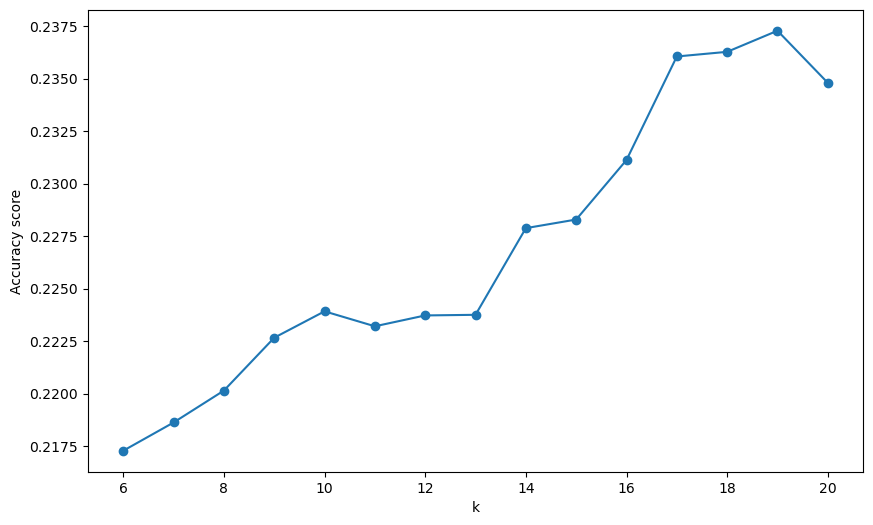

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

MSEs = []

for k in range(6,21):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [39]:
MSEs

[33190.0571658461,
 33133.04820267431,
 33068.57385643932,
 32961.83198949232,
 32908.526786922164,
 32938.7348820395,
 32916.80328241044,
 32915.54827660949,
 32740.48524210044,
 32723.108125890227,
 32602.893831786754,
 32393.7790971463,
 32384.39977163672,
 32341.75742417568,
 32447.009130147682]

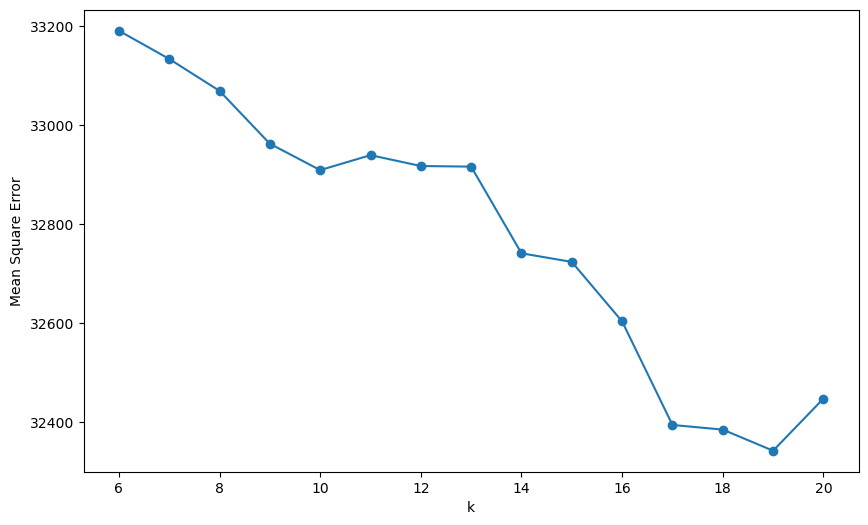

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(6,21), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
plt.show()

In [41]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [42]:
predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train)

0.52081678925622

In [43]:
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.5050109713005367